<a href="https://colab.research.google.com/github/ItzelCabrera/Machine-Learning-Techniques/blob/master/AnalisisDelincuencia.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


# Intro

In [ ]:
#!pip install geopandas
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# Indicadores

importan paquetes y archivos para mostrar las clasificaciones



In [ ]:
import pandas as pd
import numpy as np
import os
import geopandas as gpd
import matplotlib.pyplot as plt

data_dir = '/content/drive/MyDrive/ProgramaDelfín_23/Delfin 2023/Analisis delincuencia/data/' #ruta de directorio de los archivos de datos

#LEE LA CARTOGRAFÍA DE ENTIDADES Y MUNICIPIOS DE MÉXICO
fileindex = os.path.join(data_dir, 'national/national_estatal.shp')
base = gpd.read_file(fileindex) #base del mapa --> mapa de México con sus delimitación geográfica
fileindex = os.path.join(data_dir, 'conjunto_de_datos/00mun.shp')
layer = gpd.read_file(fileindex,index = "CVEGEO")
layer= layer.to_crs("EPSG:4326") # corrige el sistema de coordenadas de referencia para los municipios --> utiliza latitud y longitud

fileindex = os.path.join(data_dir, 'vacio.xlsx') # datos de indicadores
bd = pd.read_excel(fileindex,sheet_name='datos') #DataFrame creado que contendrá los datos de los indicadores
#preprocesamiento
bd = bd.drop(['CVE_ENT','NOM_ENT','NOM_MUN','GM_2020','GG_2020','GDP_2020','GPNEA_2020'], axis = 1)#eliminamos cols innecesarias
bd["CVE_MUN"] = bd["CVE_MUN"].astype(str)#cambiamos el índice a formato str
aux = bd[bd["CVE_MUN"].str.len() < 5] #obtengo el conjunto de datos a modificar
bd.loc[0:len(aux)-1, "CVE_MUN"] = '0' + aux["CVE_MUN"].astype(str)
bd.set_index('CVE_MUN', inplace=True)

# une la información cartográfica y del dataframe; utiliza el código de municipio (CVE_MUN) como clave de unión
layer = layer.merge(bd, left_on="CVEGEO",right_on=bd.index)

### Error en el número de municipios

Layer tiene considera dos municipios más

In [ ]:
import pandas as pd
import numpy as np
import os
import geopandas as gpd
import matplotlib.pyplot as plt

data_dir = '/content/drive/MyDrive/ProgramaDelfín_23/Delfin 2023/Analisis delincuencia/data/' #ruta de directorio de los archivos de datos

#LEE LA CARTOGRAFÍA DE ENTIDADES Y MUNICIPIOS DE MÉXICO
fileindex = os.path.join(data_dir, 'national/national_estatal.shp')
base = gpd.read_file(fileindex) #base del mapa --> mapa de México con sus delimitación geográfica
fileindex = os.path.join(data_dir, 'conjunto_de_datos/00mun.shp')
layer = gpd.read_file(fileindex,index = "CVEGEO")
layer= layer.to_crs("EPSG:4326") # corrige el sistema de coordenadas de referencia para los municipios --> utiliza latitud y longitud

fileindex = os.path.join(data_dir, 'vacio.xlsx') # datos de indicadores
bd = pd.read_excel(fileindex,sheet_name='datos') #DataFrame creado que contendrá los datos de los indicadores

#preprocesamiento
bd = bd.drop(['CVE_ENT','NOM_ENT','NOM_MUN','GM_2020','GG_2020','GDP_2020','GPNEA_2020'], axis = 1)#eliminamos cols innecesarias
bd["CVE_MUN"] = bd["CVE_MUN"].astype(str)#cambiamos el índice a formato str
aux = bd[bd["CVE_MUN"].str.len() < 5] #obtengo el conjunto de datos a modificar
bd.loc[0:len(aux), "CVE_MUN"] = '0' + aux["CVE_MUN"].astype(str)
bd.set_index('CVE_MUN', inplace=True)
bd_ = pd.DataFrame(bd.index)
layer_ = pd.DataFrame(layer["CVEGEO"])


In [ ]:
merged = layer_.merge(bd, left_on='CVEGEO', right_on='CVE_MUN', how='left', indicator=True)
filas_extras = merged.loc[merged['_merge'] == 'left_only', layer_.columns]
filas_extras

CVEGEO
16   02007
31   04013
320  10001

In [ ]:
print(layer["NOMGEO"][16])
print(layer["NOMGEO"][31])

San Felipe
Dzitbalché


## Conjunto

Se muestran todos los indicadores

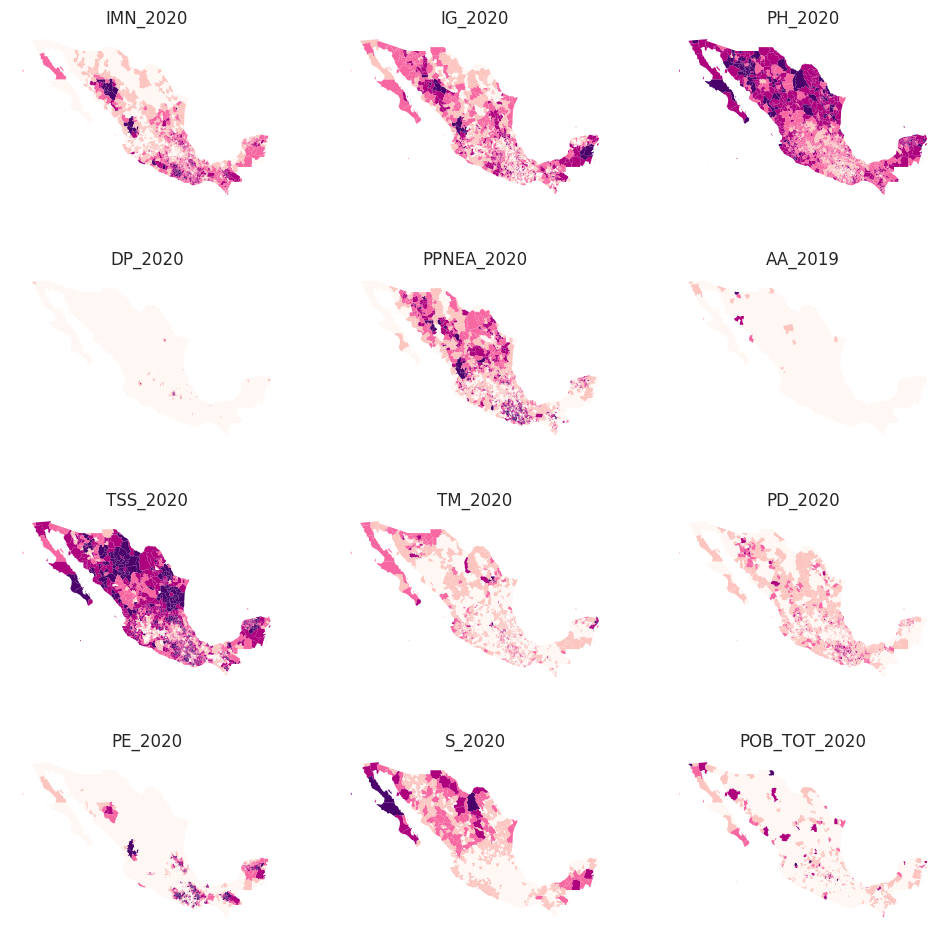

In [ ]:
#!pip install mapclassify

cluster_variables = ['IMN_2020','IG_2020','PH_2020','DP_2020','PPNEA_2020','AA_2019','TSS_2020','TM_2020','PD_2020','PE_2020','S_2020','POB_TOT_2020']

f,axs = plt.subplots(nrows = 4, ncols = 3, figsize = (12,12))
axs = axs.flatten()

for i,col in enumerate(cluster_variables):
  ax = axs[i]
  layer.plot(
      column = col,
      ax = ax,
      scheme = "Fisher_Jenks",
      linewidth = 0,
      cmap = "RdPu",
  )
  ax.set_axis_off()
  ax.set_title(col)

plt.show()

## 01_Indice de marginacion

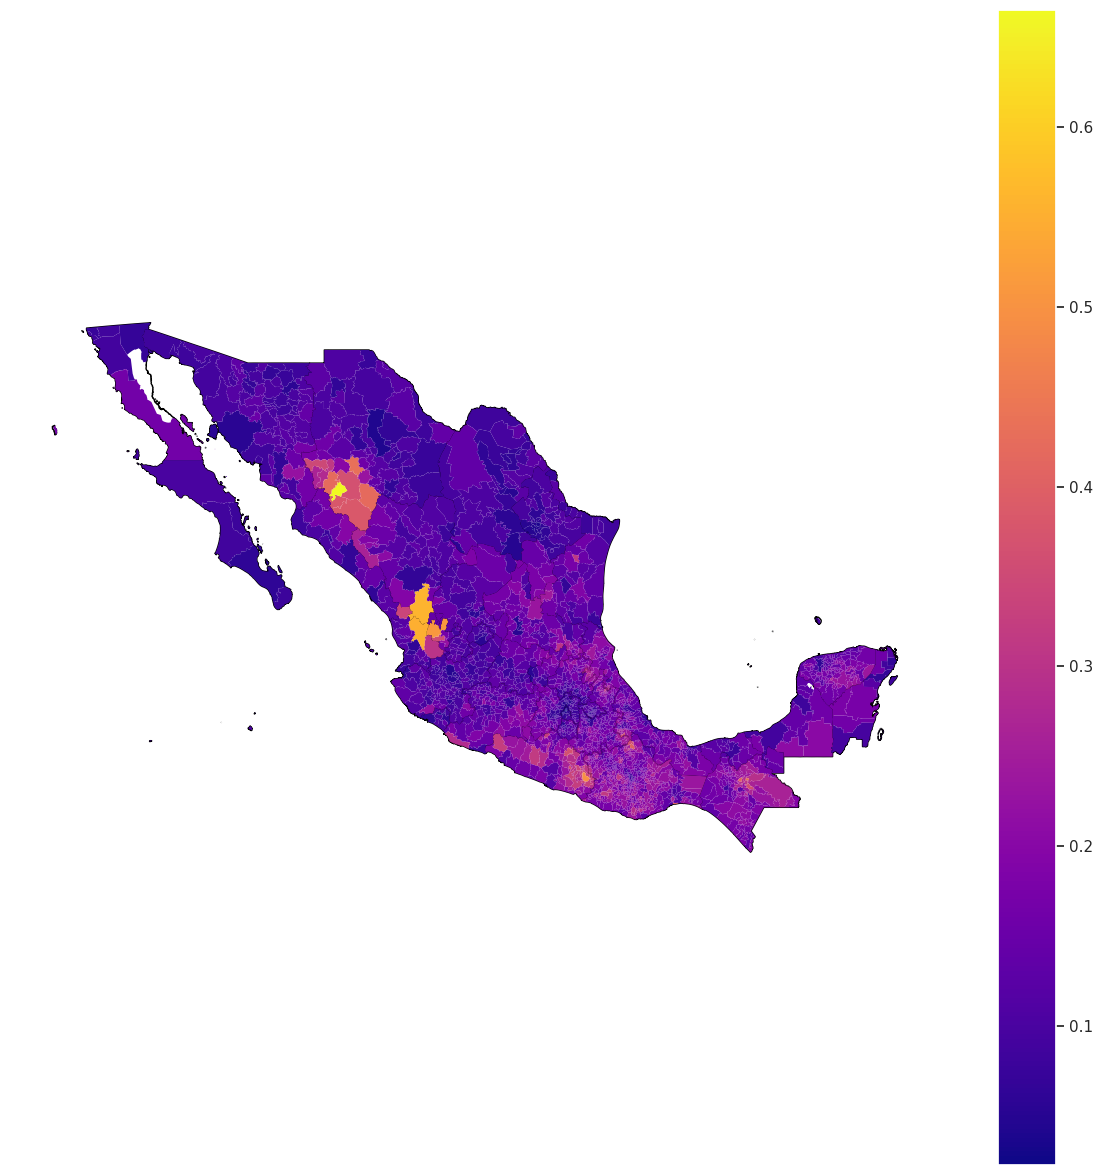

In [ ]:
#Código para visualizar un mapa de México con el índice de marginación POR MUNICIPIO

#GRAFICA EL INDICADOR A NIVEL MUNICIPAL
f, ax = plt.subplots(1, figsize=(15, 15))
ax.set_aspect('equal')
# mapa de las entidades de México
base.plot(color='white', edgecolor='black', ax=ax)
# mapa de los municipios con su IM
layer.plot(column='IMN_2020', categorical=False, legend=True, linewidth=0, ax=ax, cmap="plasma")
# Remove axis
ax.set_axis_off()
plt.show()

## 02_Indice de Gini


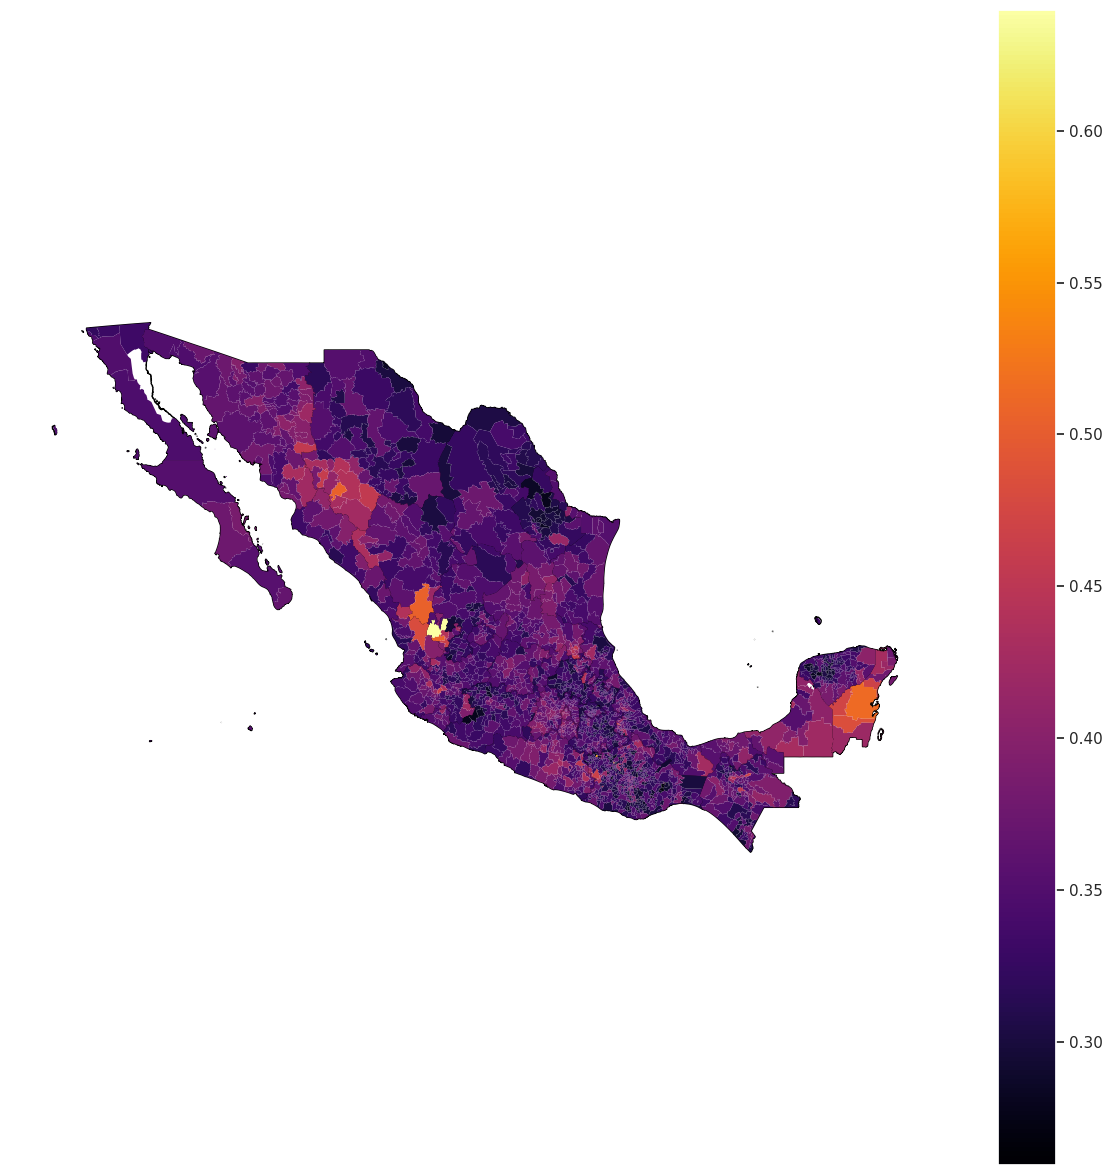

In [ ]:
#Código para visualizar un mapa de México con el índice de gini POR MUNICIPIO

#GRAFICA EL INDICADOR A NIVEL MUNICIPAL
f, ax = plt.subplots(1, figsize=(15, 15))
ax.set_aspect('equal')
# mapa de las entidades de México
base.plot(color='white', edgecolor='black', ax=ax)
# mapa de los municipios con su índice de gini
layer.plot(column='IG_2020', categorical=False, legend=True, linewidth=0, ax=ax, cmap="inferno")
# Remove axis
ax.set_axis_off()
plt.show()

## 03_Porcentaje de Hombres  

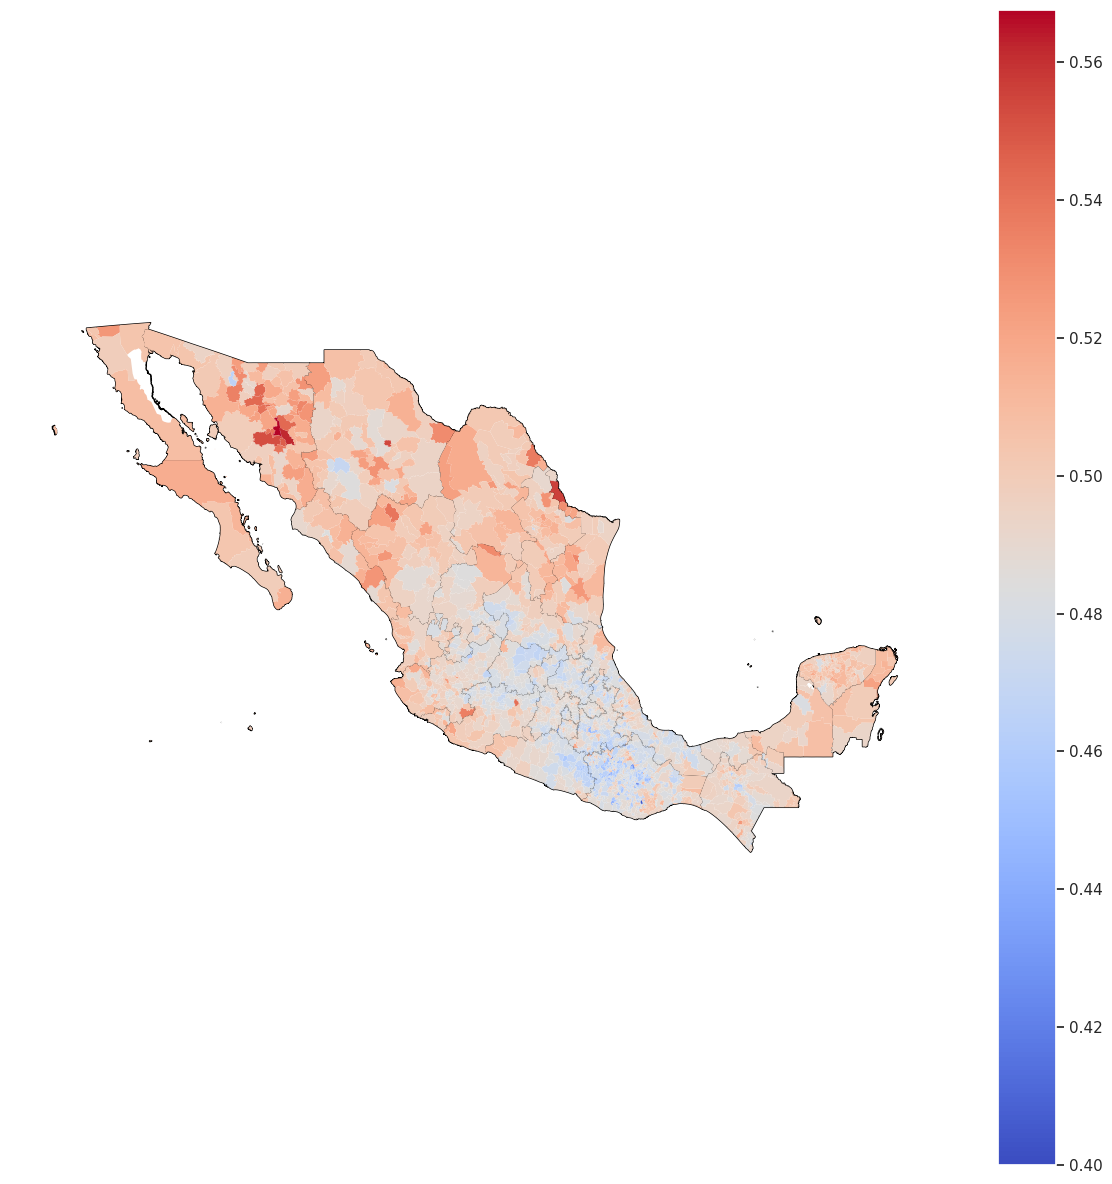

In [ ]:
#Código para visualizar un mapa de México con el % de hombres POR MUNICIPIO

#GRAFICA EL INDICADOR A NIVEL MUNICIPAL
f, ax = plt.subplots(1, figsize=(15, 15))
ax.set_aspect('equal')
# mapa de las entidades de México
base.plot(color='white', edgecolor='black', ax=ax)
# mapa de los municipios con su % de hombres
layer.plot(column='PH_2020', categorical=False, legend=True, linewidth=0, ax=ax, cmap="coolwarm")
# Remove axis
ax.set_axis_off()
plt.show()

## 04_Densidad de población



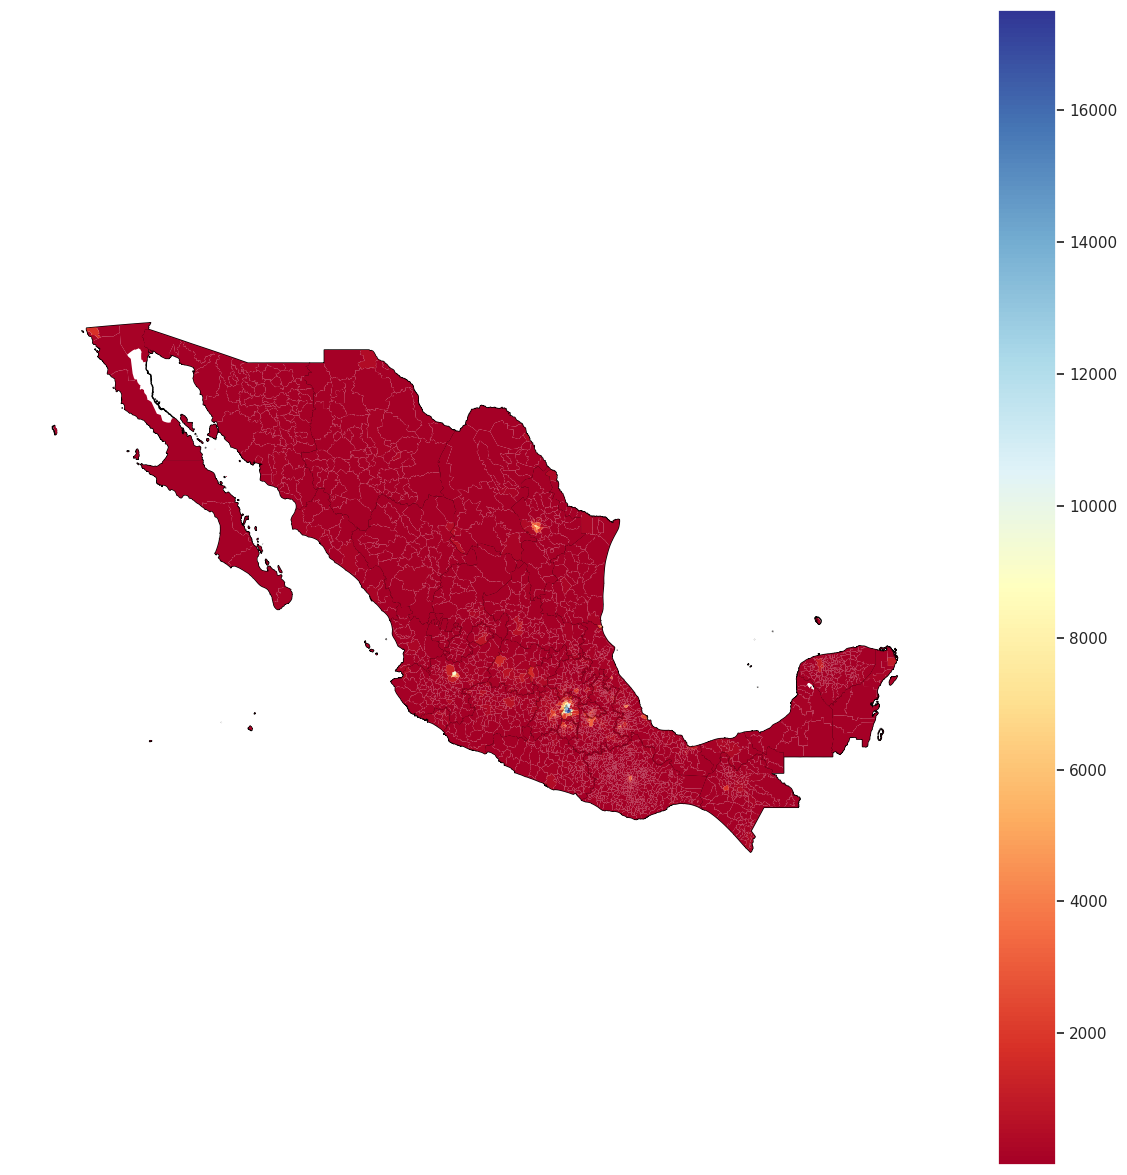

In [ ]:
#Código para visualizar un mapa de México con la densidad de población POR MUNICIPIO

#GRAFICA EL INDICADOR A NIVEL MUNICIPAL
f, ax = plt.subplots(1, figsize=(15, 15))
ax.set_aspect('equal')
# mapa de las entidades de México
base.plot(color='white', edgecolor='black', ax=ax)
# mapa de los municipios con su densidad de población
layer.plot(column='DP_2020', categorical=False, legend=True, linewidth=0, ax=ax, cmap="RdYlBu")
# Remove axis
ax.set_axis_off()
plt.show()

## 05_Población No Económicamente Activa


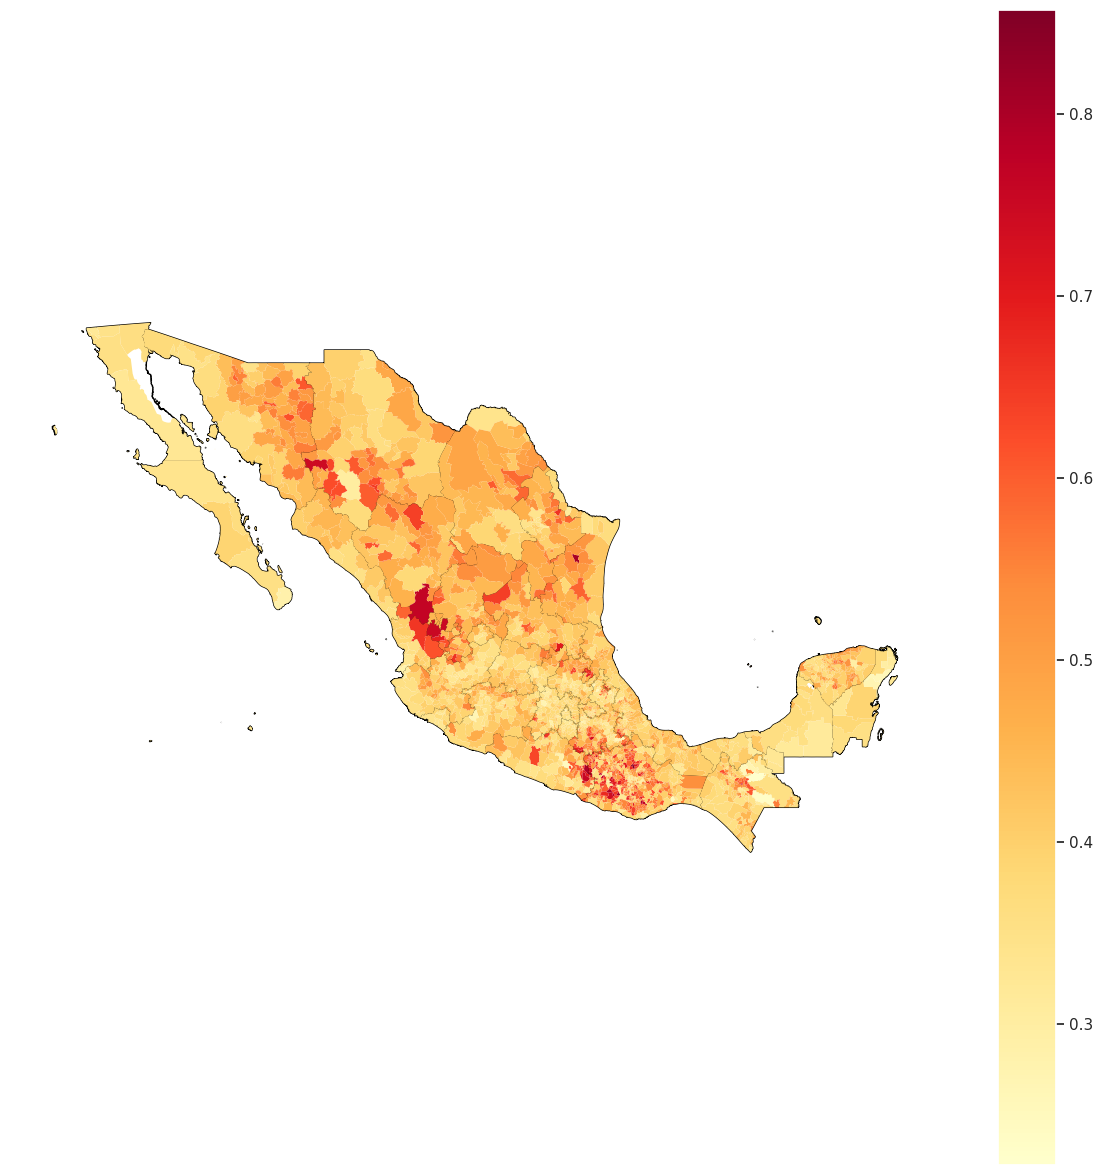

In [ ]:
#Código para visualizar un mapa de México con el % de población no económicamente activa POR MUNICIPIO

#GRAFICA EL INDICADOR A NIVEL MUNICIPAL
f, ax = plt.subplots(1, figsize=(15, 15))
ax.set_aspect('equal')
# mapa de las entidades de México
base.plot(color='white', edgecolor='black', ax=ax)
# mapa de los municipios con su % de población no económicamente activa
layer.plot(column='PPNEA_2020', categorical=False, legend=True, linewidth=0, ax=ax, cmap="YlOrRd")
# Remove axis
ax.set_axis_off()
plt.show()

## 06_Armas aseguradas

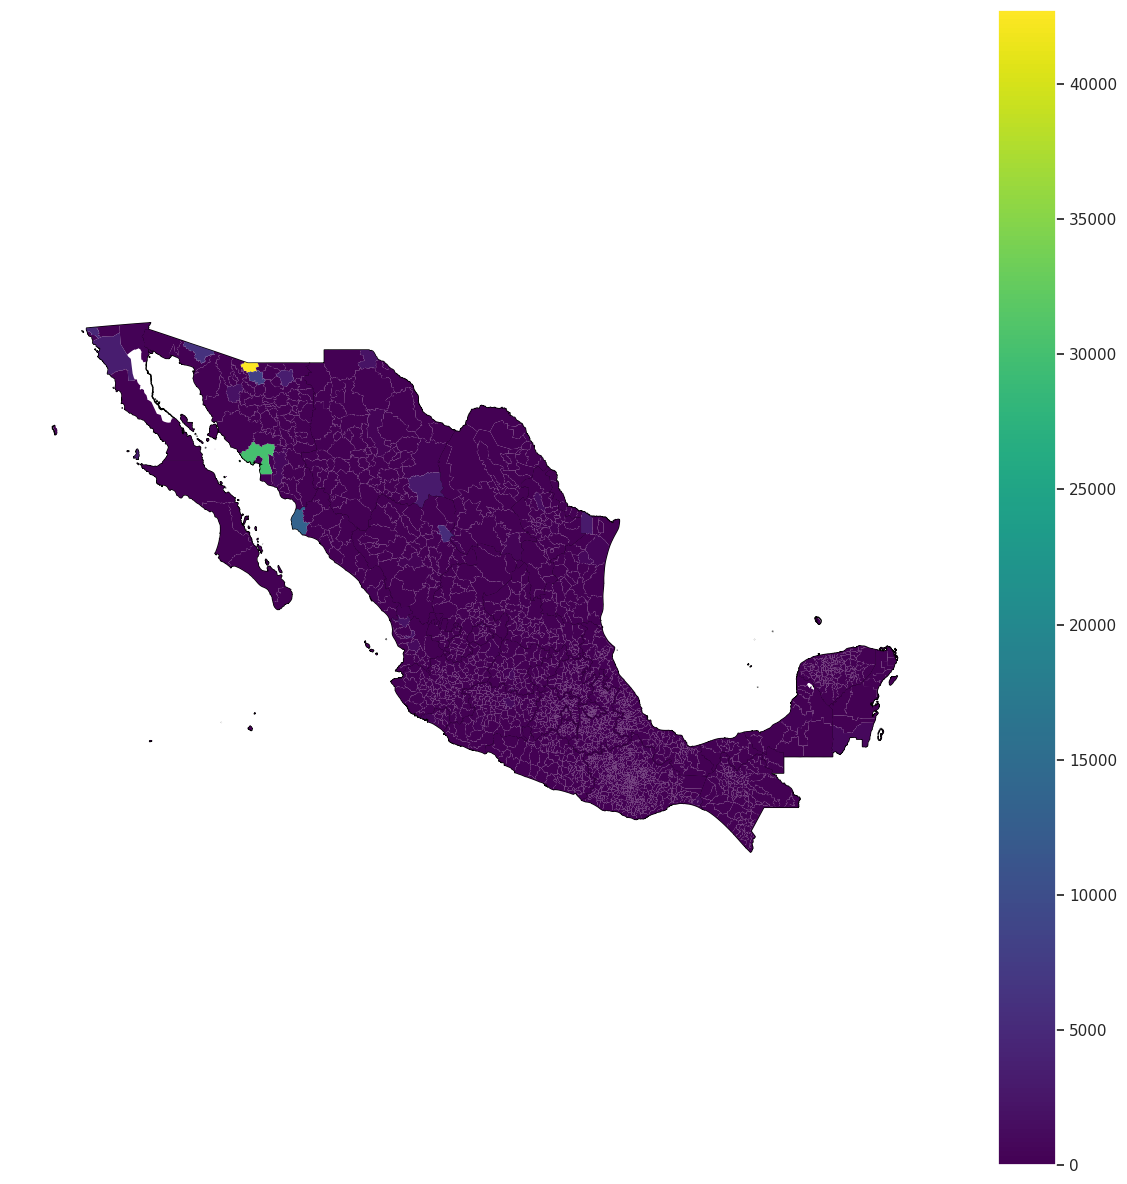

In [ ]:
#Código para visualizar un mapa de México con el # de armas aseguradas POR MUNICIPIO

#GRAFICA EL INDICADOR A NIVEL MUNICIPAL
f, ax = plt.subplots(1, figsize=(15, 15))
ax.set_aspect('equal')
# mapa de las entidades de México
base.plot(color='white', edgecolor='black', ax=ax)
# mapa de los municipios con su el # de armas aseguradas
layer.plot(column='AA_2019', categorical=False, legend=True, linewidth=0, ax=ax, cmap="viridis")
# Remove axis
ax.set_axis_off()
plt.show()

## 07_Tasa de personas con seguro de social

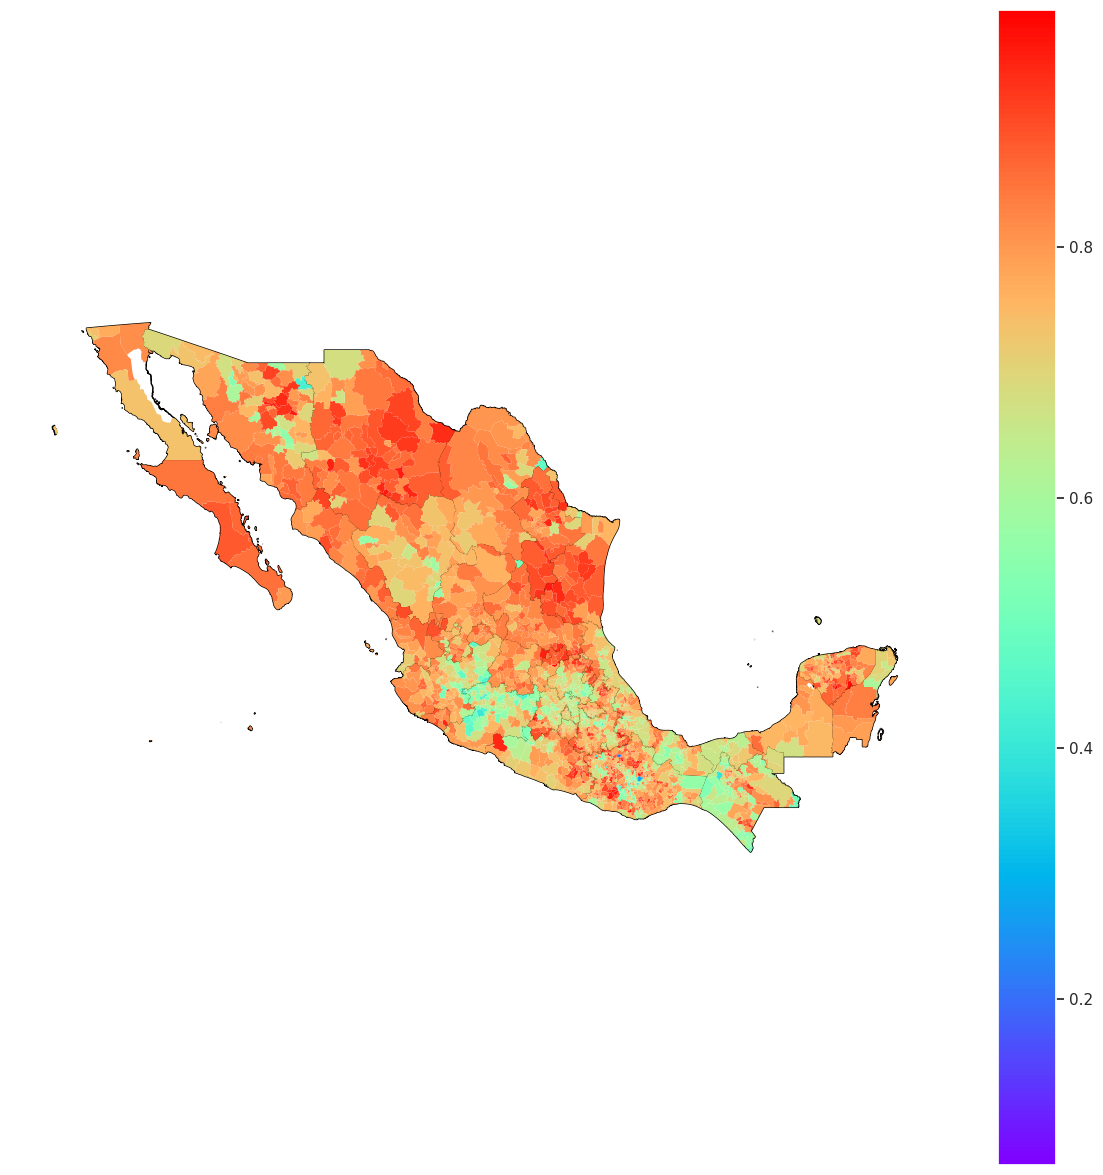

In [ ]:
#Código para visualizar un mapa de México con la tasa de personas con seguro social POR MUNICIPIO

#GRAFICA EL INDICADOR A NIVEL MUNICIPAL
f, ax = plt.subplots(1, figsize=(15, 15))
ax.set_aspect('equal')
# mapa de las entidades de México
base.plot(color='white', edgecolor='black', ax=ax)
# mapa de los municipios con la tasa de personas con seguro social
layer.plot(column='TSS_2020', categorical=False, legend=True, linewidth=0, ax=ax, cmap="rainbow")
# Remove axis
ax.set_axis_off()
plt.show()

## 08_Tasa de personas migrantes

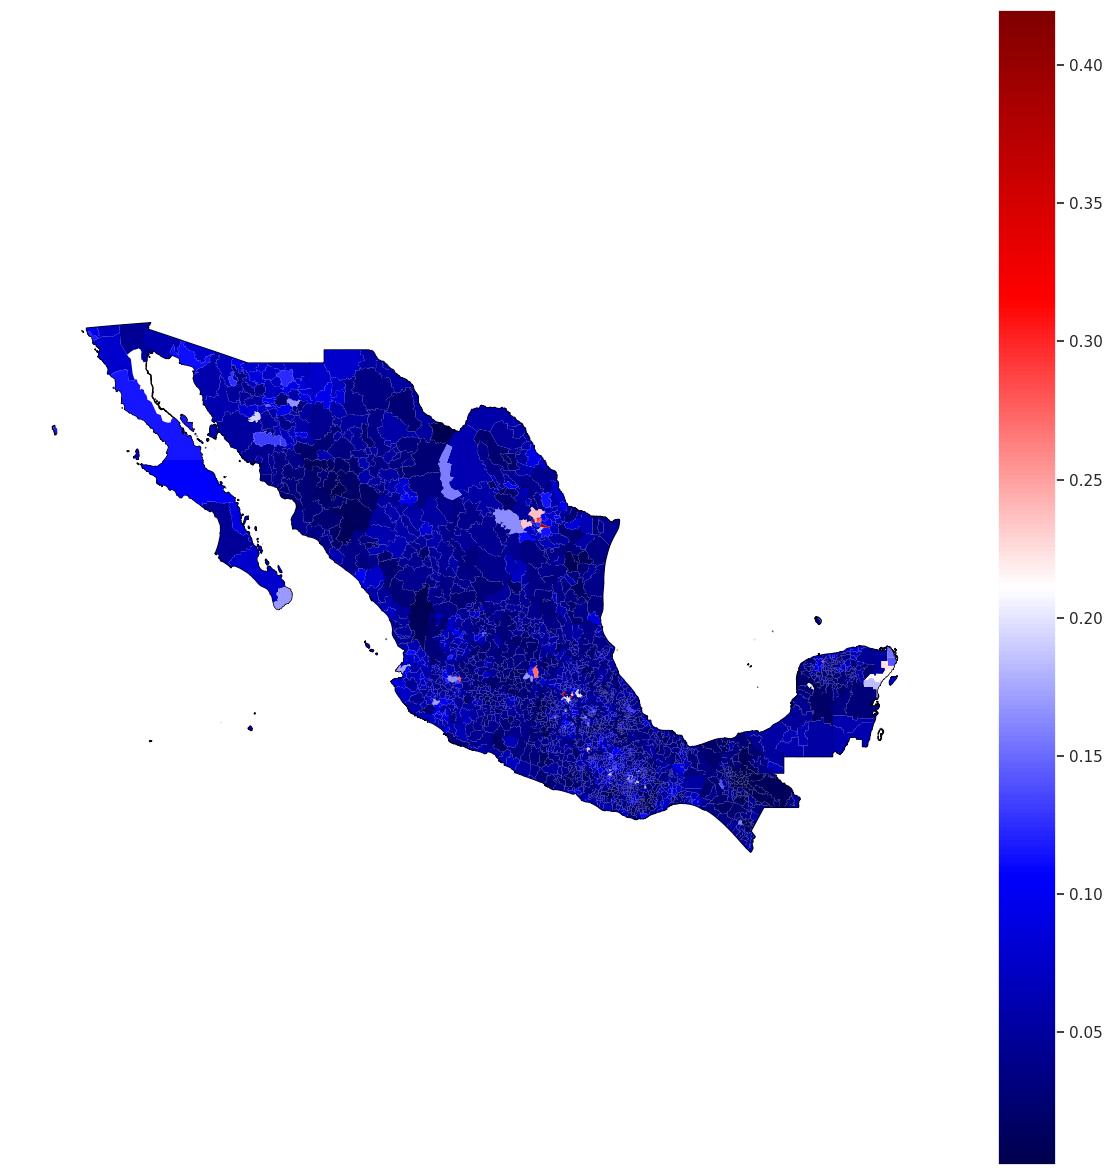

In [ ]:
#Código para visualizar un mapa de México con la tasa de personas migrantes POR MUNICIPIO

#GRAFICA EL INDICADOR A NIVEL MUNICIPAL
f, ax = plt.subplots(1, figsize=(15, 15))
ax.set_aspect('equal')
# mapa de las entidades de México
base.plot(color='white', edgecolor='black', ax=ax)
# mapa de los municipios con la tasa de personas migrantes
layer.plot(column='TM_2020', categorical=False, legend=True, linewidth=0, ax=ax, cmap="seismic")
# Remove axis
ax.set_axis_off()
plt.show()

## 09_Porcentaje de población discapacitada

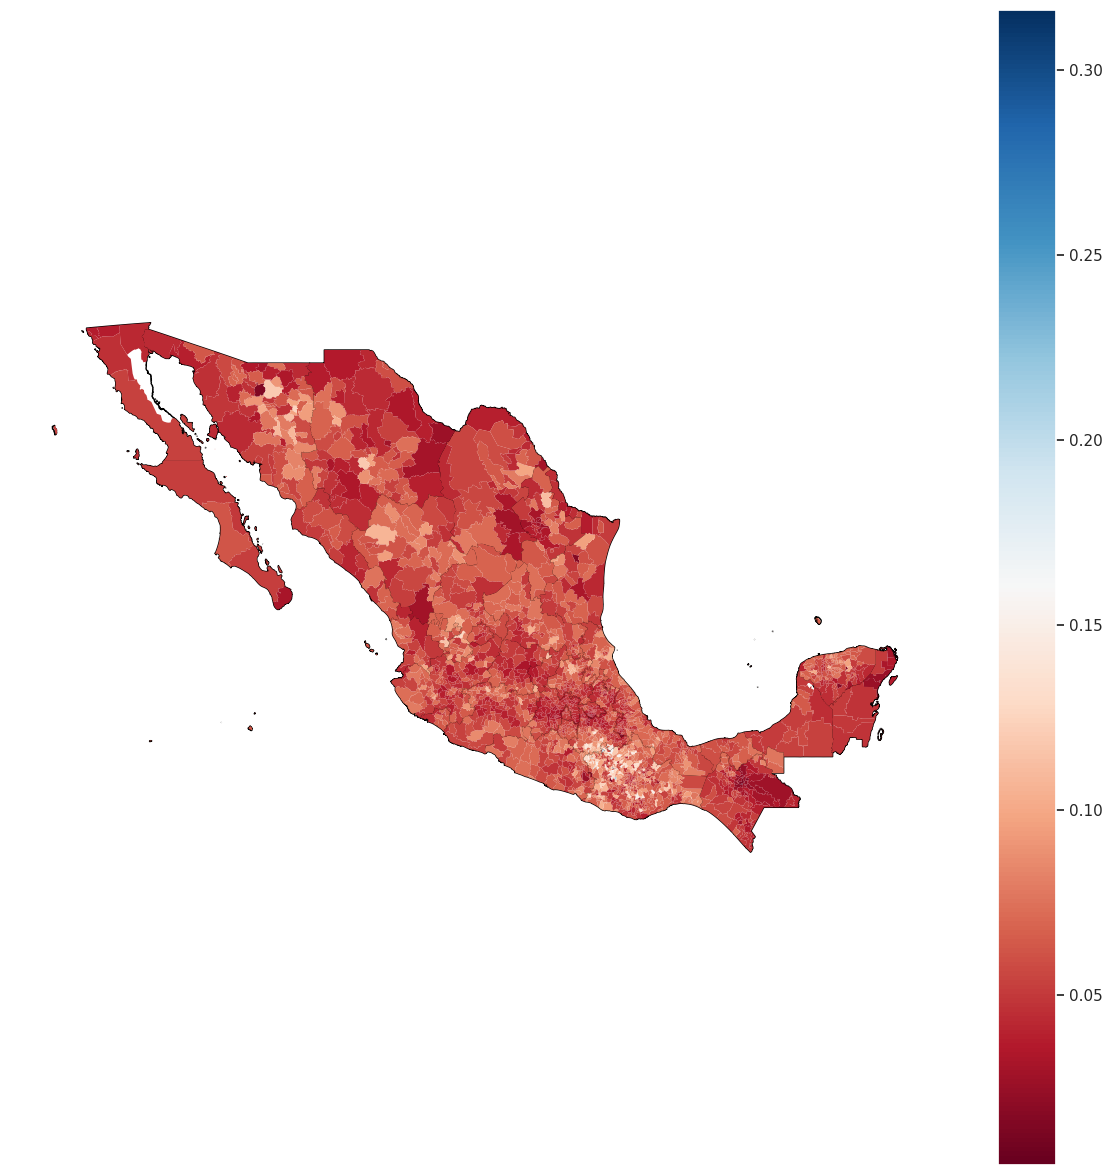

In [ ]:
#Código para visualizar un mapa de México con el % de población discapacitada POR MUNICIPIO

#GRAFICA EL INDICADOR A NIVEL MUNICIPAL
f, ax = plt.subplots(1, figsize=(15, 15))
ax.set_aspect('equal')
# mapa de las entidades de México
base.plot(color='white', edgecolor='black', ax=ax)
# mapa de los municipios con el % de población discapacitada
layer.plot(column='PD_2020', categorical=False, legend=True, linewidth=0, ax=ax, cmap="RdBu")
# Remove axis
ax.set_axis_off()
plt.show()

## 10_Población que habla alguna lengua indígena

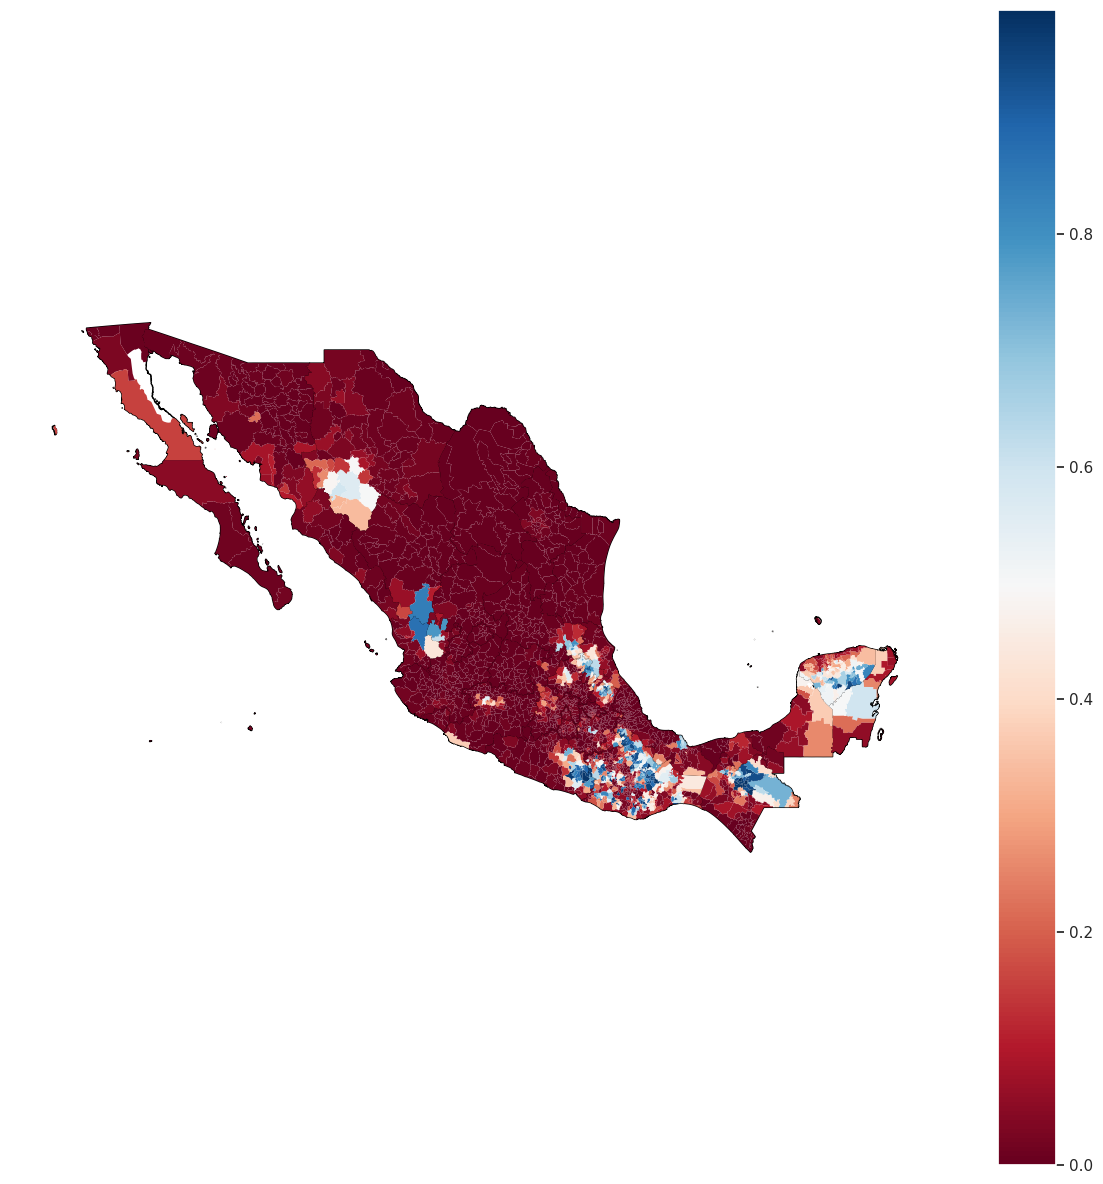

In [ ]:
#Código para visualizar un mapa de México con el % de población que hable alguna lengua indígena POR MUNICIPIO

#GRAFICA EL INDICADOR A NIVEL MUNICIPAL
f, ax = plt.subplots(1, figsize=(15, 15))
ax.set_aspect('equal')
# mapa de las entidades de México
base.plot(color='white', edgecolor='black', ax=ax)
# mapa de los municipios con el % de población que hable alguna lengua indígena
layer.plot(column='PE_2020', categorical=False, legend=True, linewidth=0, ax=ax, cmap="RdBu")
# Remove axis
ax.set_axis_off()
plt.show()

## 11_Superficie

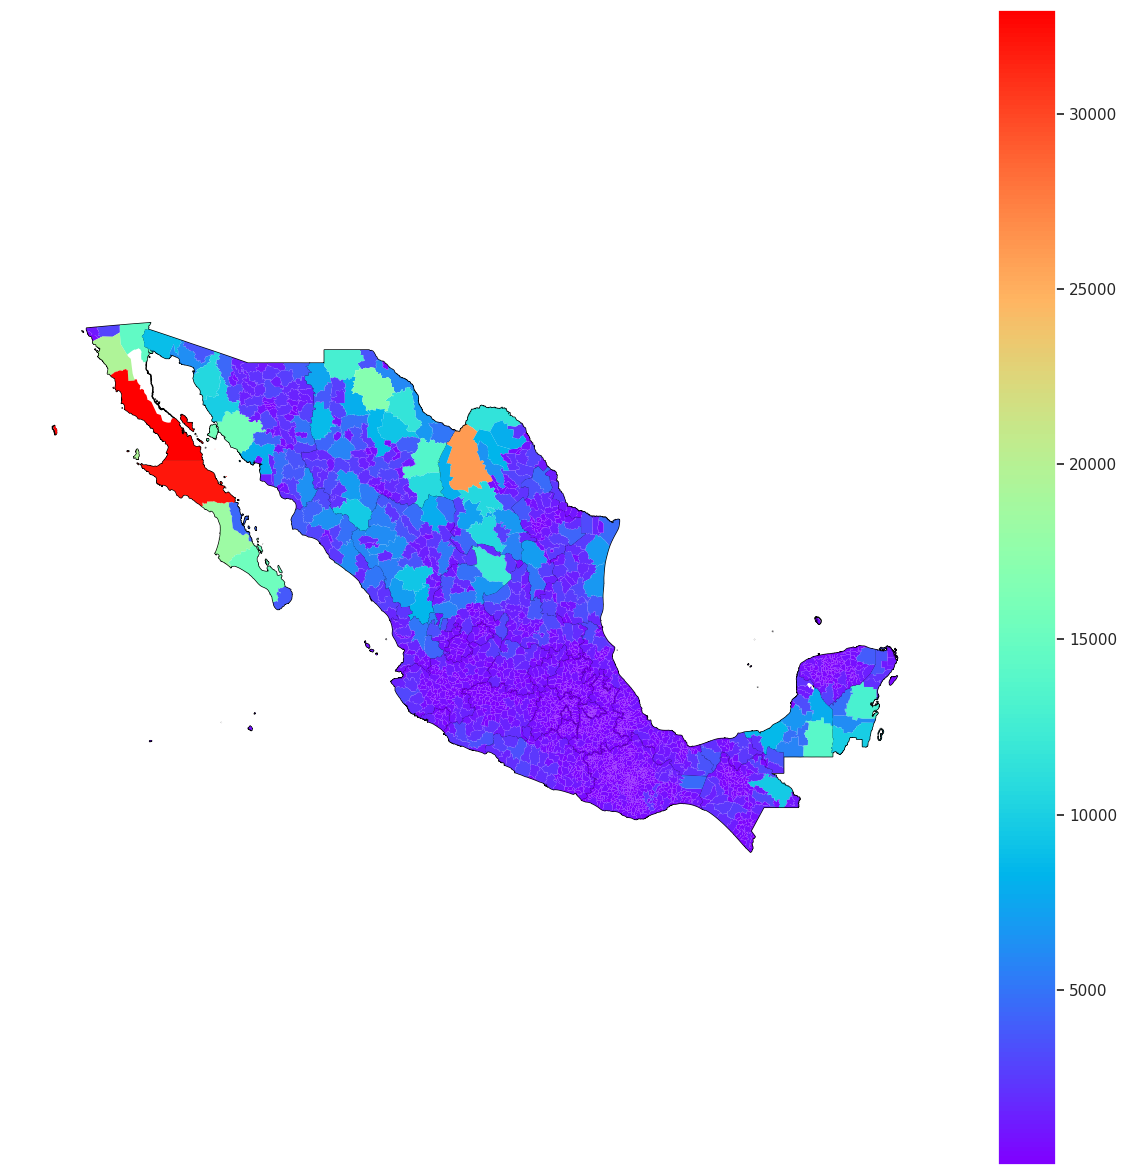

In [ ]:
#Código para visualizar un mapa de México con la superficie (km) POR MUNICIPIO

#GRAFICA EL INDICADOR A NIVEL MUNICIPAL
f, ax = plt.subplots(1, figsize=(15, 15))
ax.set_aspect('equal')
# mapa de las entidades de México
base.plot(color='white', edgecolor='black', ax=ax)
# mapa de los municipios con el la superficie (km)
layer.plot(column='S_2020', categorical=False, legend=True, linewidth=0, ax=ax, cmap="rainbow")
# Remove axis
ax.set_axis_off()
plt.show()

## 12_Población Total

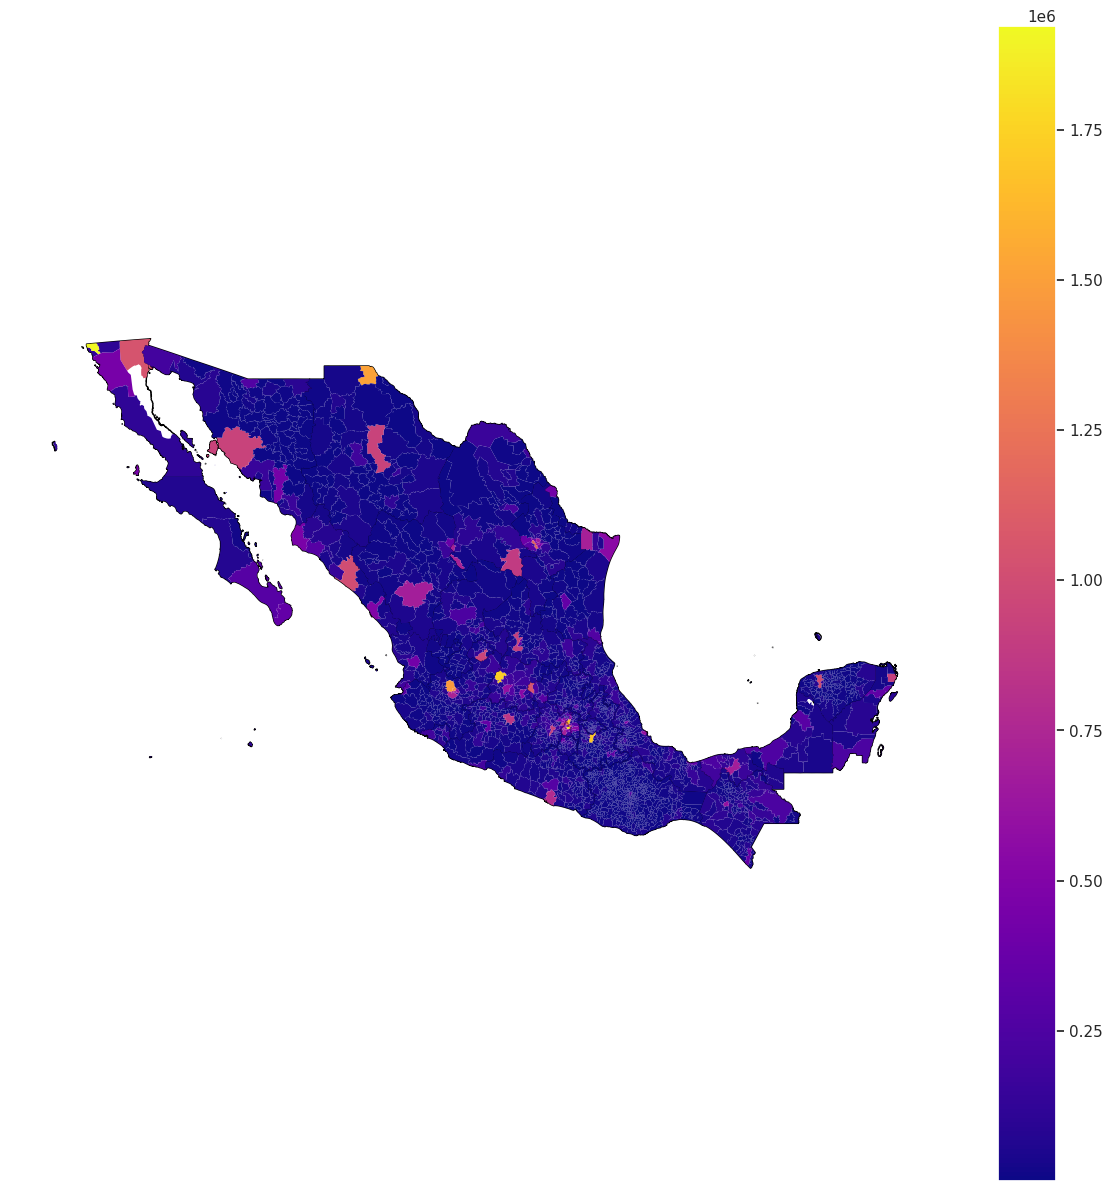

In [ ]:
#Código para visualizar un mapa de México con la población total POR MUNICIPIO

#GRAFICA EL INDICADOR A NIVEL MUNICIPAL
f, ax = plt.subplots(1, figsize=(15, 15))
ax.set_aspect('equal')
# mapa de las entidades de México
base.plot(color='white', edgecolor='black', ax=ax)
# mapa de los municipios con la población total
layer.plot(column='POB_TOT_2020', categorical=False, legend=True, linewidth=0, ax=ax, cmap="plasma")
# Remove axis
ax.set_axis_off()
plt.show()

# Visualización


In [ ]:
import pandas as pd
import numpy as np
import os
import geopandas as gpd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import robust_scale
import matplotlib as mpl
import os
from sklearn.preprocessing import minmax_scale

sns.set() #ensure consistent styling throughout the visualizations
%matplotlib inline

Obtiene la información y quitamos cols innecesarias

In [ ]:
data_dir = '/content/drive/MyDrive/ProgramaDelfín_23/Delfin 2023/Analisis delincuencia/data/' #ruta de directorio de los archivos de datos

fileindex = os.path.join(data_dir, 'vacio.xlsx') # datos de indicadores
bd = pd.read_excel(fileindex,sheet_name='datos') #DataFrame creado que contendrá los datos de los indicadores
cluster_variables = ['IMN_2020','IG_2020','PH_2020','DP_2020','PPNEA_2020','AA_2019','TSS_2020','TM_2020','PD_2020','PE_2020','S_2020','POB_TOT_2020']

#preprocesamiento
bd = bd.drop(['CVE_ENT','NOM_ENT','NOM_MUN','GM_2020','GG_2020','GDP_2020','GPNEA_2020'], axis = 1)#eliminamos cols innecesarias
bd["CVE_MUN"] = bd["CVE_MUN"].astype(str)#cambiamos el índice a formato str
aux = bd[bd["CVE_MUN"].str.len() < 5] #obtengo el conjunto de datos a modificar
bd.loc[0:len(aux)-1, "CVE_MUN"] = '0' + aux["CVE_MUN"].astype(str)
bd.set_index('CVE_MUN', inplace=True)



Escalamos los datos

In [ ]:
X = StandardScaler().fit_transform(bd) #z-score normalization: zero mean & unit variance
#X = robust_scale(bd[cluster_variables])

## Implementando descomposición espectral directamente para PCA

In [ ]:
cov_x = np.cov(X.T) #cálculo de la covarianza
vals, vecs = np.linalg.eig(cov_x)
# la descomposicion se ordena de forma descendente
idx = vals.argsort()[::-1]
eigvals = vals[idx]
eigvecs = vecs[:,idx]

print(eigvecs)
print(eigvals)

[[-4.72092264e-05  2.35182210e-02 -3.89387479e-02  1.63581029e-03
  -3.79783933e-01  2.51337849e-02  5.79041870e-02 -3.35461777e-02
  -2.16200226e-01 -1.26141729e-01  4.46574477e-01 -7.65832337e-01]
 [ 9.72764739e-06 -9.67749818e-03  2.92323271e-02 -2.97612603e-02
  -3.29094349e-02 -1.57112351e-01 -2.05223495e-01  8.86802324e-02
  -9.27794306e-01  1.52501391e-01 -9.82471918e-02  1.69429740e-01]
 [ 2.77733505e-05  8.07534786e-03  3.89749484e-02 -7.09245552e-02
   1.82135937e-01 -1.58666253e-01 -2.33635199e-02 -8.10767543e-01
  -1.22287781e-01 -5.09673653e-01 -3.55720698e-02  3.40617186e-02]
 [ 7.79556990e-06 -9.52354848e-01 -2.56566927e-01 -1.62684595e-01
  -1.84445894e-02 -6.39247771e-03  1.44750559e-02 -8.45282312e-03
   2.85340500e-03 -5.01137563e-03  9.24579954e-04 -5.58773742e-03]
 [-2.95899137e-05  1.58670688e-02 -3.81734650e-02  2.14497220e-03
  -2.18235317e-01  1.57521442e-01  2.93237563e-01 -2.27274247e-01
  -4.79226483e-02  2.16988542e-01  6.81857402e-01  5.23349584e-01]
 [ 9.

Análisis de la varianza para determinar componentes principales a mantener.

*   Desviación estándar
*   Varianza propia
*   Varianza acumulada



In [ ]:
dat = {'PC':range(1,13),'std':np.sqrt(eigvals), 'var_prop':eigvals/sum(eigvals),
       'cum_prop':np.cumsum(eigvals/sum(eigvals))}
stds = pd.DataFrame(data = dat)
stds

PC          std      var_prop  cum_prop
0    1  1128.709984  9.998956e-01  0.999896
1    2     9.991853  7.835776e-05  0.999974
2    3     4.053239  1.289420e-05  0.999987
3    4     3.140966  7.743128e-06  0.999995
4    5     1.514770  1.800874e-06  0.999996
5    6     1.132454  1.006541e-06  0.999997
6    7     0.992882  7.737231e-07  0.999998
7    8     0.876466  6.029201e-07  0.999999
8    9     0.766706  4.613682e-07  0.999999
9   10     0.672653  3.551179e-07  1.000000
10  11     0.561655  2.475876e-07  1.000000
11  12     0.472913  1.755303e-07  1.000000

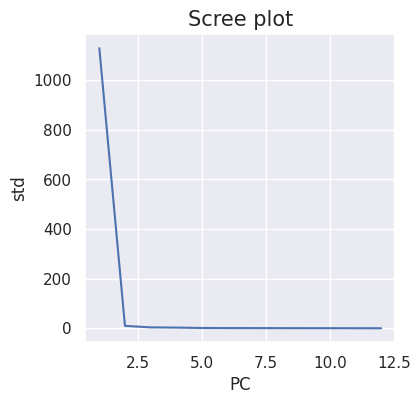

In [ ]:
plt.figure(figsize=(4, 4))
sns.lineplot(x="PC", y="std", data=stds)
plt.title('Scree plot', fontsize=15);

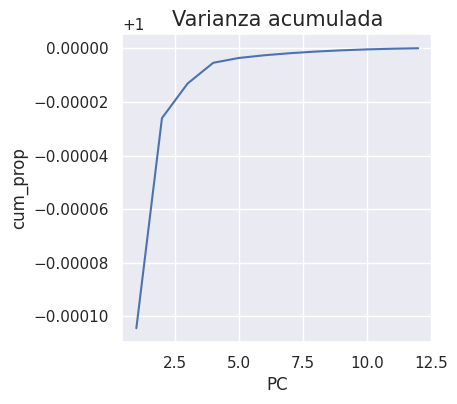

In [ ]:
plt.figure(figsize=(4, 4))
sns.lineplot(x="PC", y="cum_prop", data=stds)
plt.title('Varianza acumulada', fontsize=15);

Cada PC representa una combinación lineal de las variables originales en el conjunto de datos. Se ordenan de acuerdo con su importancia relativa, medida por la cantidad de varianza que explican en los datos (primer PC var relacionado con la mayor varianza). Ayudan a identificar patrones o relaciones entre las variables originales.

In [ ]:
# componentes
comps = pd.DataFrame(data=eigvecs.T, columns=bd.columns,
                     index=['pc1','pc2','pc3','pc4','pc5','pc6','pc7','pc8','pc9','pc10','pc11','pc12'])
print(comps.T)

                   pc1       pc2       pc3       pc4       pc5       pc6  \
POB_TOT_2020 -0.000047  0.023518 -0.038939  0.001636 -0.379784  0.025134   
IMN_2020      0.000010 -0.009677  0.029232 -0.029761 -0.032909 -0.157112   
IG_2020       0.000028  0.008075  0.038975 -0.070925  0.182136 -0.158666   
PH_2020       0.000008 -0.952355 -0.256567 -0.162685 -0.018445 -0.006392   
DP_2020      -0.000030  0.015867 -0.038173  0.002145 -0.218235  0.157521   
PPNEA_2020    1.000000  0.000125 -0.000469  0.000058 -0.000026 -0.000004   
AA_2019       0.000015  0.008760  0.005877 -0.022766 -0.150694  0.078786   
TSS_2020      0.000017 -0.016563 -0.005339 -0.000645  0.365523  0.790978   
TM_2020      -0.000033  0.015641 -0.035853  0.009641 -0.024850  0.477782   
PD_2020      -0.000036  0.015064 -0.047384  0.035406 -0.781273  0.247445   
PE_2020       0.000269  0.021237  0.476094 -0.871717 -0.063905  0.048552   
S_2020        0.000401 -0.301302  0.835803  0.453711 -0.046228  0.030662   

           

## Implementando sklearn para PCA

In [ ]:
from sklearn.decomposition import PCA

pca = PCA()
# ajustar en los datos estandarizados
pca.fit(X)

dat = {'PC':range(1,13),'std':np.sqrt(pca.explained_variance_), 'var_prop':pca.explained_variance_ratio_,
       'cum_prop':np.cumsum(pca.explained_variance_ratio_)}

stds = pd.DataFrame(data = dat)
stds

PC       std  var_prop  cum_prop
0    1  1.652483  0.227466  0.227466
1    2  1.227068  0.125424  0.352890
2    3  1.202669  0.120486  0.473375
3    4  1.079730  0.097112  0.570487
4    5  0.990019  0.081645  0.652132
5    6  0.944931  0.074378  0.726510
6    7  0.884028  0.065099  0.791609
7    8  0.847206  0.059789  0.851398
8    9  0.784307  0.051241  0.902639
9   10  0.683973  0.038969  0.941608
10  11  0.639292  0.034044  0.975652
11  12  0.540643  0.024348  1.000000

Cada PC representa una combinación lineal de las variables originales en el conjunto de datos. Se ordenan de acuerdo con su importancia relativa, medida por la cantidad de varianza que explican en los datos (primer PC var relacionado con la mayor varianza). Ayudan a identificar patrones o relaciones entre las variables originales.

In [ ]:
# componentes
comps = pd.DataFrame(data=pca.components_.T, columns=['pc1','pc2','pc3','pc4','pc5','pc6','pc7','pc8','pc9','pc10','pc11','pc12'],
                     index=bd.columns)
print(comps)

                   pc1       pc2       pc3       pc4       pc5       pc6  \
IMN_2020     -0.480115 -0.020388  0.280436 -0.083795  0.013220  0.134995   
IG_2020       0.115939  0.125700  0.471095 -0.167966 -0.123653  0.656107   
PH_2020       0.138522  0.590870 -0.090219  0.061095 -0.198763 -0.185128   
DP_2020       0.298469 -0.381055  0.271416  0.376142 -0.179313 -0.075663   
PPNEA_2020   -0.440415  0.016028 -0.034751  0.338545 -0.098073  0.031973   
AA_2019       0.070493  0.136564  0.077912  0.258986  0.925977  0.029966   
TSS_2020     -0.233825  0.301594  0.099046  0.532974 -0.186864 -0.231125   
TM_2020       0.210532 -0.128903 -0.386364  0.264392 -0.053834  0.400993   
PD_2020      -0.239557 -0.113912 -0.407720  0.324514 -0.027765  0.455589   
PE_2020      -0.394662 -0.173507  0.367178  0.048506  0.056506 -0.017284   
S_2020        0.123298  0.539104  0.167852  0.134629 -0.025683  0.288188   
POB_TOT_2020  0.348561 -0.171052  0.349320  0.397632 -0.058170 -0.065236   

           

## Proyección de los datos en los componentes principales

Scatter matrix que demuestra la relación entre cada componente; la diagonal muestra la distribución univariada de la componente en respecto

In [ ]:
proj = pd.DataFrame(pca.transform(X),columns = ['pc1','pc2','pc3','pc4','pc5','pc6','pc7','pc8','pc9','pc10','pc11','pc12'])
#sns.set()
#sns.pairplot(proj, height=2);
proj

pc1       pc2       pc3       pc4       pc5       pc6       pc7  \
0     3.879204 -0.703257  2.286805  2.360438 -0.641251 -0.250531 -1.014527   
1     0.303445  0.484921 -0.320426  0.231134 -0.165892 -0.865319 -0.156463   
2     0.588901  0.403886 -0.473796  0.090076 -0.131583 -0.104074 -0.369221   
3     0.336233  0.565283 -0.171658  0.408592  1.055668 -1.057527  0.096578   
4     2.117089  0.330167 -0.091513 -0.133407 -0.274009  0.138440  1.205241   
...        ...       ...       ...       ...       ...       ...       ...   
2464 -0.553022  0.442768 -0.270914  0.420026 -0.263795 -0.267402 -0.618182   
2465  0.517338  0.750508 -0.703493  0.032841 -0.062336 -0.196479 -0.556549   
2466  1.398894 -0.178971 -0.329693  0.466836 -0.146707 -0.315639  0.118195   
2467  0.301680  0.690248  0.312970 -0.182869 -0.274883 -0.531698 -0.148087   
2468 -0.414718  0.258594 -0.980539  0.865199 -0.297642 -0.261409  0.367311   

           pc8       pc9      pc10      pc11      pc12  
0     0.344842 -0.652888  1.631328 -3.477238  0.062830  
1    -0.302356 -0.813147  0.016813 -0.029206 -0.006457  
2    -0.252664 -0.601522  0.257117 -0.002473 -0.231497  
3    -0.708090 -0.961419 -0.291306  0.105868 -0.076957  
4    -0.266241 -0.751105  0.353685 -0.358049 -0.133928  
...        ...       ...       ...       ...       ...  
2464 -0.838994 -0.608583 -0.368528 -0.141815 -0.085223  
2465  0.327560 -0.071266 -0.226919  0.058935 -0.229918  
2466 -0.105880 -1.315545  0.118586 -0.387856 -0.448647  
2467 -1.032808 -1.088652 -0.131810  0.003185 -0.298666  
2468 -0.466372 -0.524960 -0.978676 -0.428027  0.002078  

[2469 rows x 12 columns]

In [ ]:
import plotly.express as px

pca_dataset = pd.DataFrame({'pc1': proj['pc1'], 'pc2': proj['pc2'], 'municipio': bd.index})
pca_dataset['municipio_str'] = pca_dataset['municipio'].astype(str) #agrego una col con la clave de los municipios en str
fig = px.scatter(pca_dataset, x='pc1', y='pc2', hover_data=['municipio'])
fig.update_layout(
    autosize=False,
    width=600,
    height=600,
)
fig.show()



In [ ]:
!pip install pca

[pca] >Plot PC1 vs PC2 with loadings.
IMN_2020       -0.480115
IG_2020         0.115939
PH_2020         0.138522
DP_2020         0.298469
PPNEA_2020     -0.440415
AA_2019         0.070493
TSS_2020       -0.233825
TM_2020         0.210532
PD_2020        -0.239557
PE_2020        -0.394662
S_2020          0.123298
POB_TOT_2020    0.348561
Name: pc1, dtype: float64


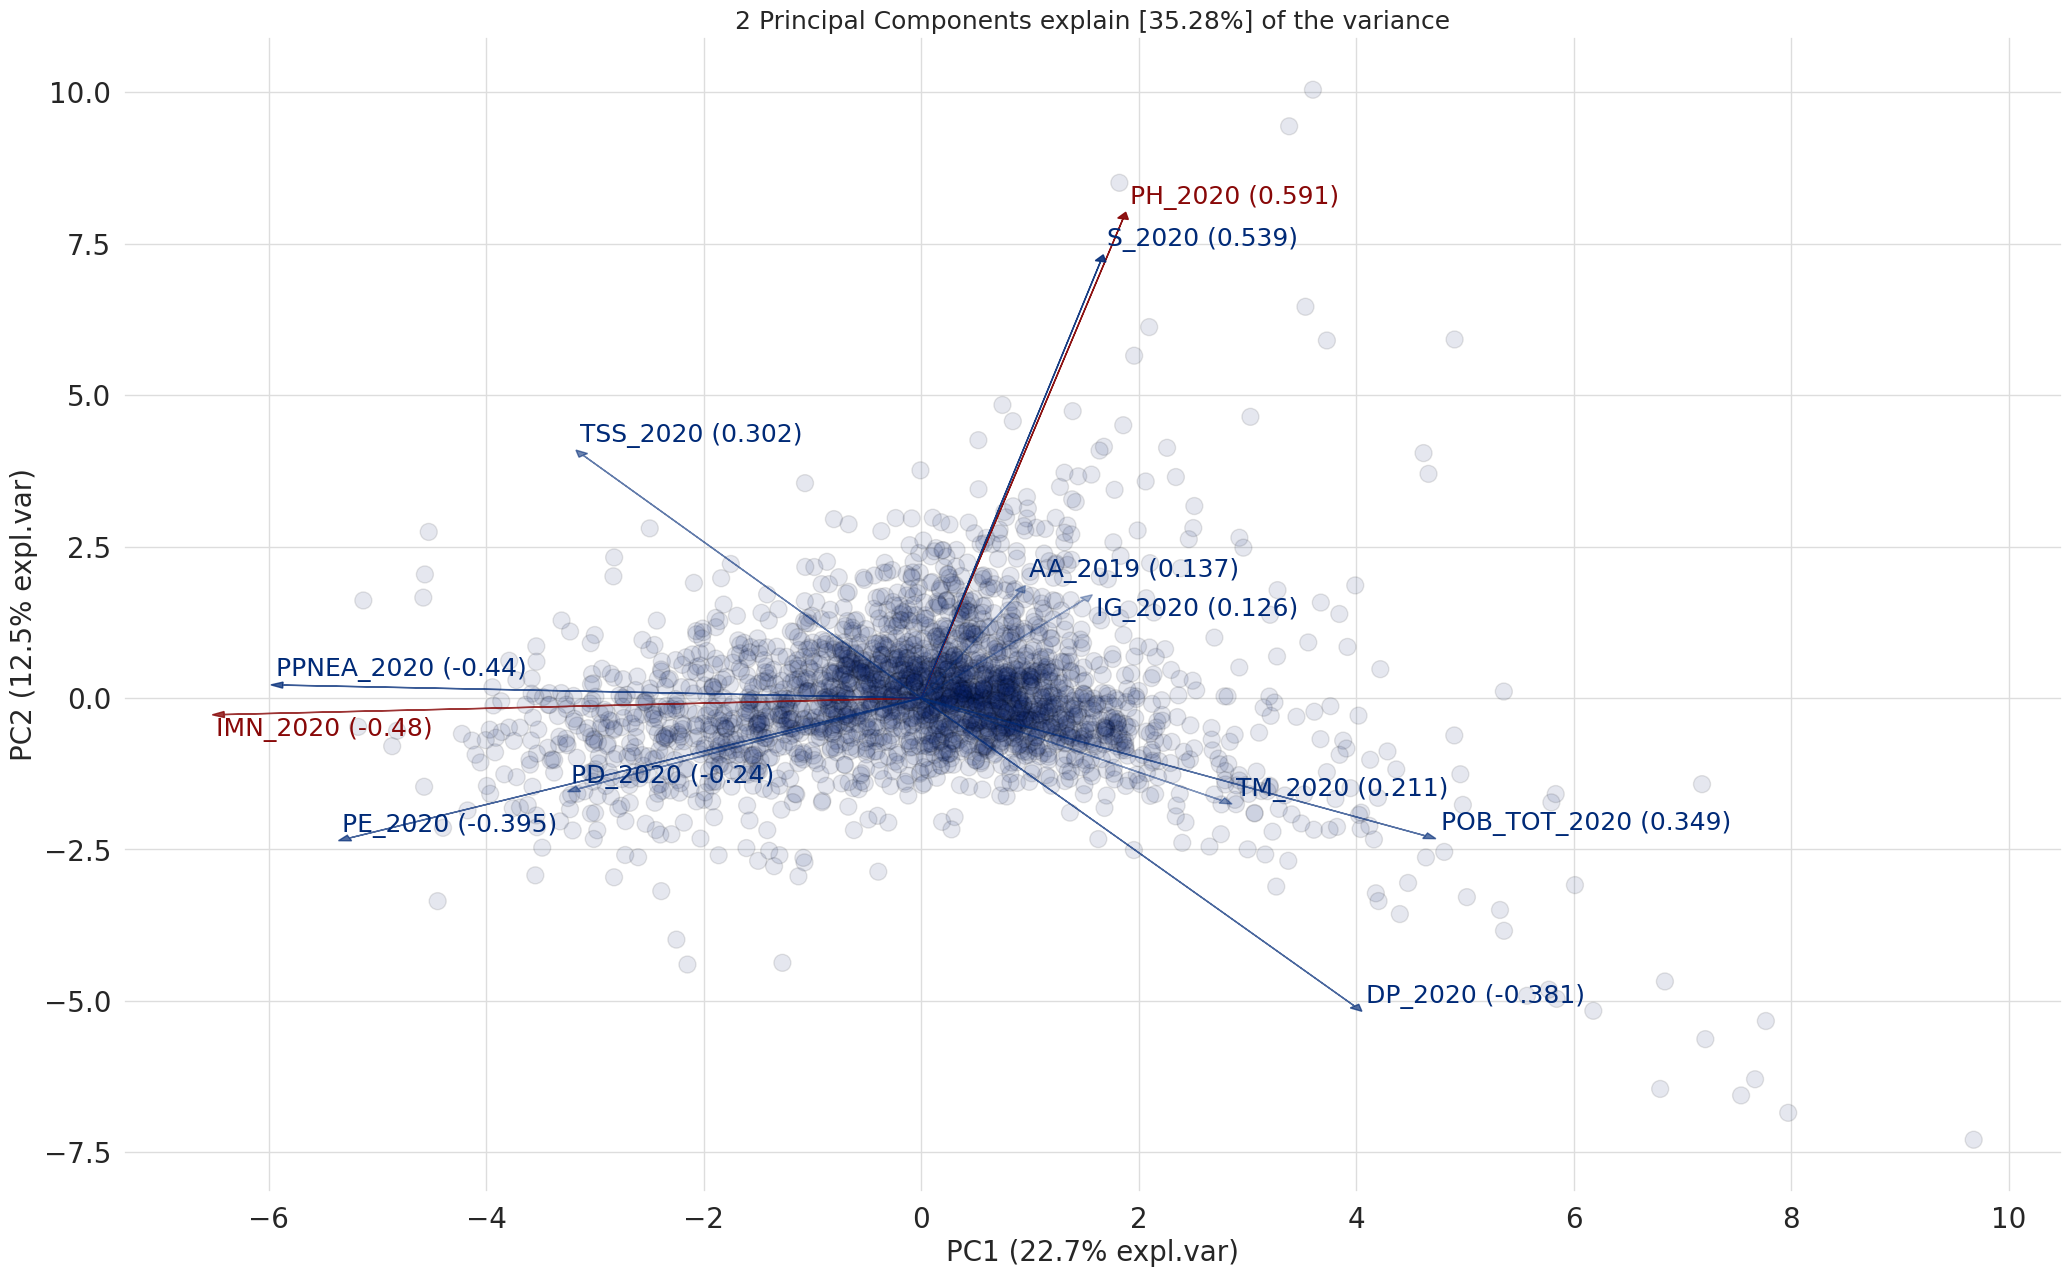

In [ ]:
# usando el módulo pca (https://pypi.org/project/pca/)
from pca import pca
model = pca(n_components=2)

# Fit transform
results = model.fit_transform(X, row_labels=bd.index, col_labels=bd.columns, verbose=False)
fig, ax = model.biplot(n_feat=12,legend = False,alpha=0.1);

print(comps['pc1'])

Visualizamos en un mapa el PC1 normalizado. Tambien normalizamos PC2

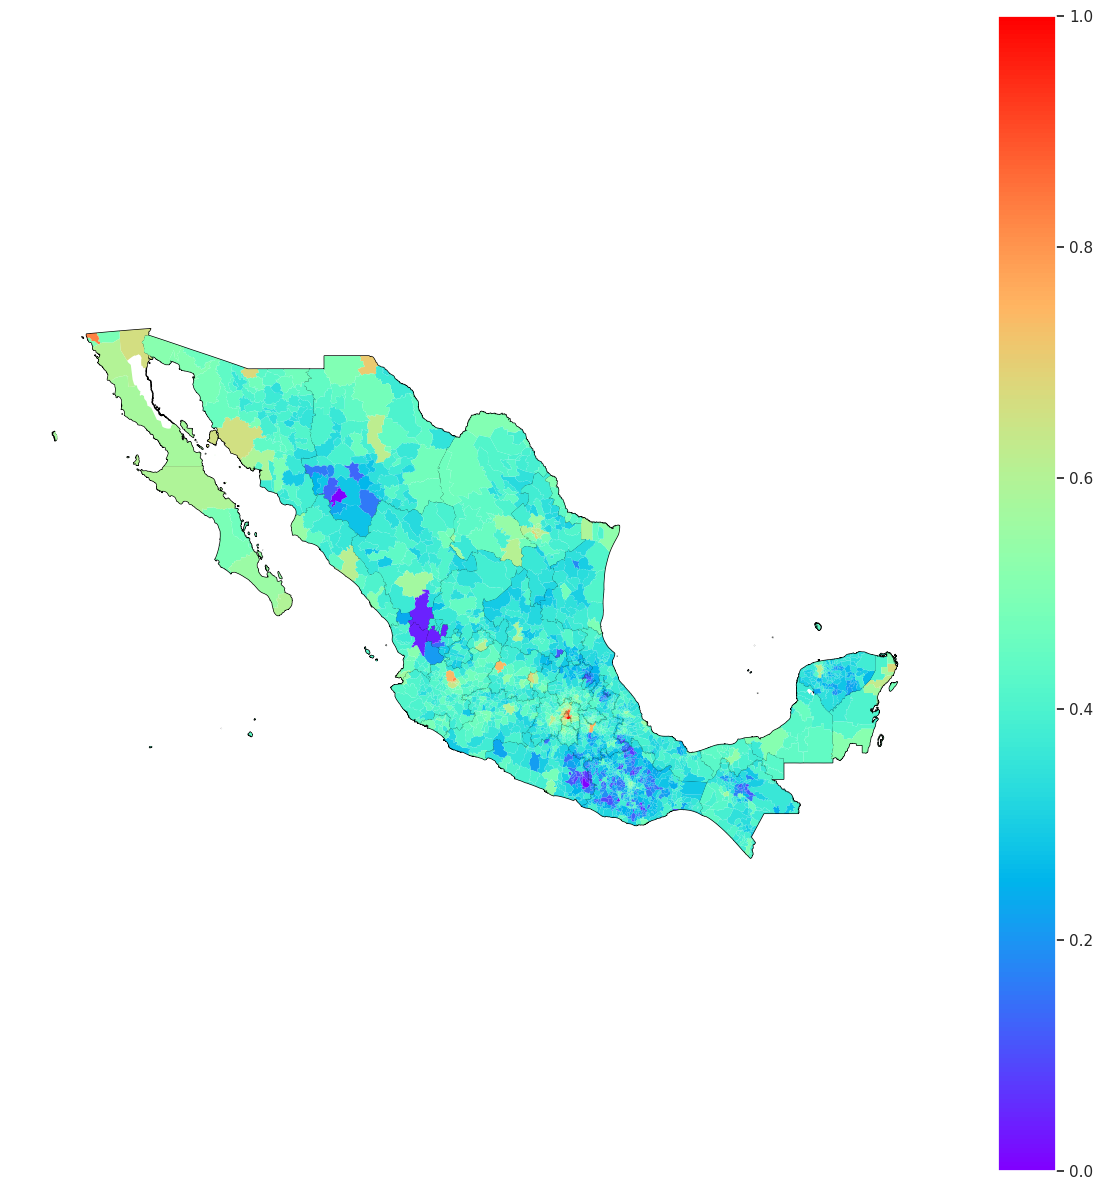

In [ ]:
#Código para visualizar un mapa de México con la PC1 POR MUNICIPIO
import pandas as pd
import numpy as np
import os
import geopandas as gpd
import matplotlib.pyplot as plt

data_dir = '/content/drive/MyDrive/ProgramaDelfín_23/Delfin 2023/Analisis delincuencia/data/' #ruta de directorio de los archivos de datos

#LEE LA CARTOGRAFÍA DE ENTIDADES Y MUNICIPIOS DE MÉXICO
fileindex = os.path.join(data_dir, 'national/national_estatal.shp')
base = gpd.read_file(fileindex) #base del mapa --> mapa de México con sus delimitación geográfica
fileindex = os.path.join(data_dir, 'conjunto_de_datos/00mun.shp')
layer = gpd.read_file(fileindex,index = "CVEGEO")
layer= layer.to_crs("EPSG:4326") # corrige el sistema de coordenadas de referencia para los municipios --> utiliza latitud y longitud

#normalización de PC1 y PC2
pca_dataset['pc1_n'] = minmax_scale(pca_dataset['pc1'])
pca_dataset['pc2_n'] = minmax_scale(pca_dataset['pc2'])

# une la información cartográfica y del dataframe; utiliza el código de municipio (CVE_MUN) como clave de unión
layer = layer.merge(pca_dataset, left_on="CVEGEO",right_on="municipio_str")

#GRAFICA EL INDICADOR A NIVEL MUNICIPAL
f, ax = plt.subplots(1, figsize=(15, 15))
ax.set_aspect('equal')
# mapa de las entidades de México
base.plot(color='white', edgecolor='black', ax=ax)
# mapa de los municipios con su densidad de población
layer.plot(column='pc1_n', categorical=False,legend = True, linewidth=0, ax=ax, cmap="rainbow") #the values should not be treated as categorical data (continuous values).
# Remove axis
ax.set_axis_off()
plt.show()


# Clustering

## Dataset para clustering (PC1)

In [ ]:
c_ds = pd.DataFrame({'pc1': pca_dataset['pc1_n'], 'pc1': pca_dataset['pc1_n'], 'municipio': pca_dataset['municipio_str']})
c_ds.set_index('municipio', inplace=True)
title = "Cluster Map (PC1)"

## Dataset para clustering (PC1 & PC2)

In [ ]:
#CLUSTERING DATASET
c_ds = pd.DataFrame({'pc1': pca_dataset['pc1_n'], 'pc2': pca_dataset['pc2_n'], 'municipio': pca_dataset['municipio_str']})
c_ds.set_index('municipio', inplace=True)
title = "Cluster Map (PC1 & PC2)"

## Dataset para clustering (PC1 componentes: IMN_2020  & PPNEA_2020 )

In [ ]:
#CLUSTERING DATASET
c_ds = pd.DataFrame({'IMN_2020': X[:,1], 'IMN_2020': X[:,5], 'municipio': bd.index})
c_ds.set_index('municipio', inplace=True)
title = "Cluster Map (IMN_2020 & PPNEA_2020)"

## Dataset para clustering (X)

In [ ]:
#CLUSTERING DATASET
c_ds = pd.DataFrame({'IMN_2020': X[:,0], 'IG_2020': X[:,1], 'PH_2020': X[:,2], 'DP_2020': X[:,3], 'PPNEA_2020	': X[:,4],
                     'AA_2019	': X[:,5], 'TSS_2020	': X[:,6], 'TM_2020': X[:,7], 'PD_2020': X[:,8], 'PE_2020': X[:,9],
                     'S_2020': X[:,10], 'v12': X[:,11],'municipio': bd.index})
c_ds.set_index('municipio', inplace=True)
title = "Cluster Map (X)"

## Elbow Method

In [ ]:
from sklearn.cluster import KMeans
from sklearn import metrics
from scipy.spatial.distance import cdist

Cálculo de las distorsiones y de la inercia.

1.   Distorsión: es el promedio de las distancias al cuadrado de los centroides a cada punto de observación.
2.   Inercia: es la sumatoria de las distancias al cuadrado de los puntos de observación al centroide más cercano

In [ ]:
distortions = []
inertias = []
mapping1 = {}
mapping2 = {}
K = range(1, 10)

for k in K:
	# Building and fitting the model
	kmeanModel = KMeans(n_clusters=k).fit(c_ds)
	kmeanModel.fit(c_ds)
  #kmeanModel.cluster_centers_ --> vector que almacena los centroides
	distortions.append(sum(np.min(cdist(c_ds, kmeanModel.cluster_centers_,
										'euclidean'), axis=1)) / c_ds.shape[0])
	inertias.append(kmeanModel.inertia_)

	mapping1[k] = sum(np.min(cdist(c_ds, kmeanModel.cluster_centers_,
								'euclidean'), axis=1)) / c_ds.shape[0]
	mapping2[k] = kmeanModel.inertia_


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will chang

### Distorsión

Tabulando los resultados usando las distorsiones

1 : 2.922179629475004
2 : 2.6680952719309126
3 : 2.582529697039138
4 : 2.4406116963897313
5 : 2.416822357551736
6 : 2.3496692259620504
7 : 2.2595283703425197
8 : 2.200359955275913
9 : 2.139180635882537


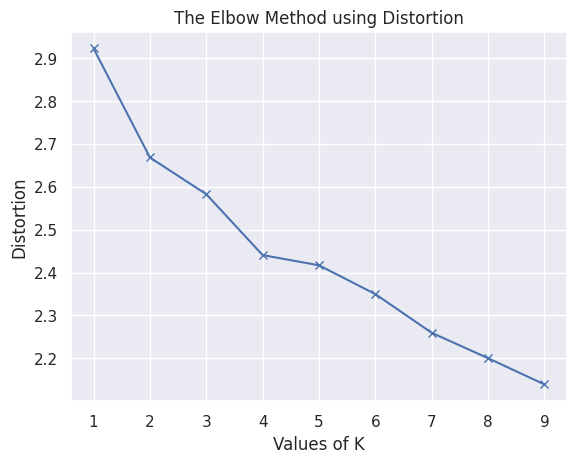

In [ ]:
for key, val in mapping1.items():
	print(f'{key} : {val}')

plt.plot(K, distortions, 'bx-')
plt.xlabel('Values of K')
plt.ylabel('Distortion')
plt.title('The Elbow Method using Distortion')
plt.show()


### Inercia

1 : 29627.999999999985
2 : 25451.439624833765
3 : 22680.94346871089
4 : 20871.759811394386
5 : 18816.305195294786
6 : 17335.049020910777
7 : 16066.838012906455
8 : 14960.066740143644
9 : 14274.126174389177


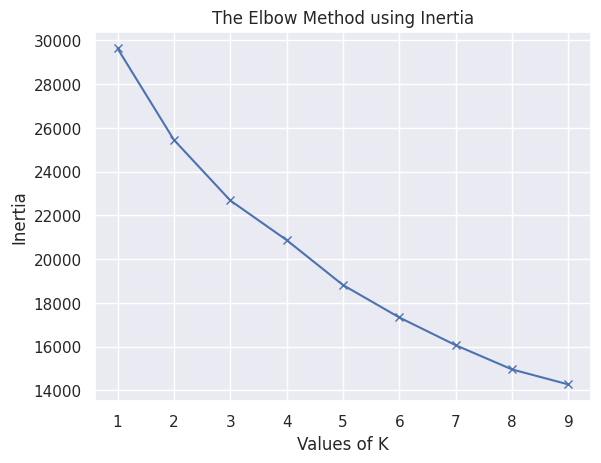

In [ ]:
for key, val in mapping2.items():
	print(f'{key} : {val}')
plt.plot(K, inertias, 'bx-')
plt.xlabel('Values of K')
plt.ylabel('Inertia')
plt.title('The Elbow Method using Inertia')
plt.show()


Determina el número de clusters a partir de las distorsiones y/o inercia

In [ ]:
nc = 3

## K-means

In [ ]:
# Initialize KMeans instance
from sklearn.cluster import KMeans

# Initialize KMeans instance
kmeans = KMeans(n_clusters=nc)

# Set the seed for reproducibility
#np.random.seed(1234)
# Run K-Means algorithm -->clusters have been assigned
kcls = kmeans.fit(c_ds)
#kcls.labels_[] --> label vector: Records the cluster to which each observation is assigned

# Assign labels into a column
c_ds["labels_kmeans"] = kcls.labels_


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning




Cardinalidad de cada cluster


In [ ]:
# Group data table by cluster label and count observations
ksizes = c_ds.groupby("labels_kmeans").size()
print(ksizes)

labels_kmeans
0    1715
1     674
2      80
dtype: int64


## AHC (agglomerative hierarchical clustering)

In [ ]:
from sklearn.cluster import AgglomerativeClustering

# Set seed for reproducibility
#np.random.seed(0)
# Initialize the algorithm
model = AgglomerativeClustering(linkage="ward", n_clusters=nc)
# Run clustering
model.fit(c_ds)
# Assign labels to main data table
c_ds["labels_ahc"] = model.labels_



Cardinalidad de cada cluster

In [ ]:
wardsizes = c_ds.groupby("labels").size()
wardsizes

labels
0      88
1     455
2    1926
dtype: int64

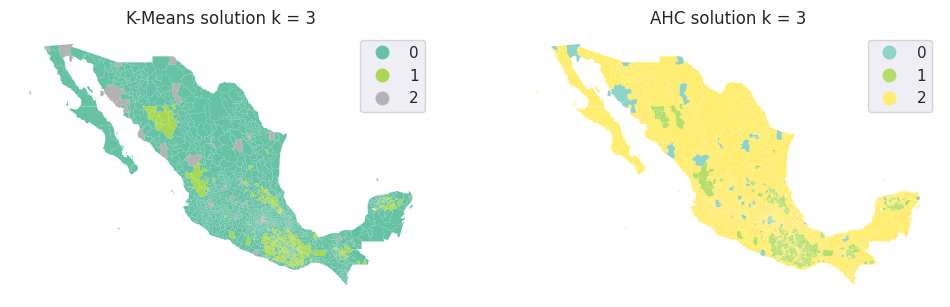

In [ ]:
data_dir = '/content/drive/MyDrive/ProgramaDelfín_23/Delfin 2023/Analisis delincuencia/data/' #ruta de directorio de los archivos de datos

#LEE LA CARTOGRAFÍA DE ENTIDADES Y MUNICIPIOS DE MÉXICO
fileindex = os.path.join(data_dir, 'national/national_estatal.shp')
base = gpd.read_file(fileindex) #base del mapa --> mapa de México con sus delimitación geográfica
fileindex = os.path.join(data_dir, 'conjunto_de_datos/00mun.shp')
layer = gpd.read_file(fileindex,index = "CVEGEO")
layer= layer.to_crs("EPSG:4326") # corrige el sistema de coordenadas de referencia para los municipios --> utiliza latitud y longitud

# une la información cartográfica y del dataframe; utiliza el código de municipio como clave de unión
layer = layer.merge(c_ds, left_on="CVEGEO",right_on=c_ds.index)

# Set up figure and ax
f, axs = plt.subplots(1, 2, figsize=(12, 6))

### K-Means ###
ax = axs[0]
# Plot unique values choropleth including
# a legend and with no boundary lines
layer.plot(
    column="labels_kmeans",
    categorical=True,
    cmap="Set2",
    legend=True,
    linewidth=0,
    ax=ax,
)
# Remove axis
ax.set_axis_off()
# Add title
ax.set_title(f"K-Means solution k = {nc}")

### AHC ###
ax = axs[1]
# Plot unique values choropleth including
# a legend and with no boundary lines
layer.plot(
    column="labels_ahc",
    categorical=True,
    cmap="Set3",
    legend=True,
    linewidth=0,
    ax=ax,
)
# Remove axis
ax.set_axis_off()
# Add title
ax.set_title(f"AHC solution k = {nc}")
# Display the map
plt.show()

## Regionalization